# Creation of a neural network using Keras mechanisms for product classification

### Import of necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

### Data loading and preparation

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Implementation of the first model with RELU activation, ADAM optimizer and 10 epochs

In [4]:
# Implementation of the model
model_1 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_1 = model_1.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_1.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 10s 11ms/step - loss: 0.7623 - accuracy: 0.7235 - val_loss: 0.4645 - val_accuracy: 0.8290
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.4883 - accuracy: 0.8256 - val_loss: 0.3821 - val_accuracy: 0.8592
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.4101 - accuracy: 0.8572 - val_loss: 0.3255 - val_accuracy: 0.8816
Epoch 4/10
750/750 [==============================] - 8s 11ms/step - loss: 0.3685 - accuracy: 0.8718 - val_loss: 0.3038 - val_accuracy: 0.8884
Epoch 5/10
750/750 [==============================] - 8s 11ms/step - loss: 0.3373 - accuracy: 0.8827 - val_loss: 0.2874 - val_accuracy: 0.8938
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.3113 - accuracy: 0.8905 - val_loss: 0.2718 - val_accuracy: 0.9002
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.2926 - accuracy: 0.8975 - val_loss: 0.2923 - val_accuracy: 0.894

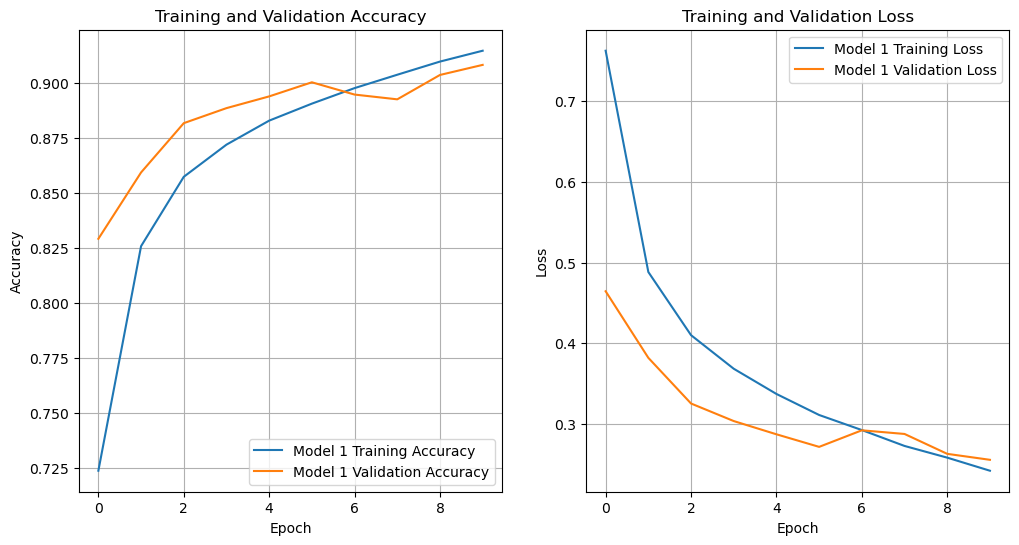

In [5]:
# Visualization of the training schedule
def plot_training_histories(histories, names):
    plt.figure(figsize=(12, 6))

    # Plotting accuracy
    plt.subplot(1, 2, 1)
    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=name + ' Validation Accuracy')

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plotting loss
    plt.subplot(1, 2, 2)
    for history, name in zip(histories, names):
        plt.plot(history.history['loss'], label=name + ' Training Loss')
        plt.plot(history.history['val_loss'], label=name + ' Validation Loss')

    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.show()

# Call the function to plot the graph
plot_training_histories([history_1], ['Model 1'])

In [6]:
def plot_training_histories_compare(histories, names):
    plt.figure(figsize=(12, 6))

    for history, name in zip(histories, names):
        plt.plot(history.history['accuracy'], label=name + ' Training Accuracy')
        
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    plt.show()

### Implementation of the second model with GELU activation, ADAM optimizer and 20 epochs

In [7]:
# Implementation of the model
model_2 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.Flatten(),
    layers.Dense(128, activation='gelu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='gelu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_2 = model_2.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_2.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
750/750 [==============================] - 15s 17ms/step - loss: 0.7827 - accuracy: 0.7153 - val_loss: 0.4638 - val_accuracy: 0.8136
Epoch 2/20
750/750 [==============================] - 12s 16ms/step - loss: 0.4852 - accuracy: 0.8270 - val_loss: 0.3630 - val_accuracy: 0.8633
Epoch 3/20
750/750 [==============================] - 12s 16ms/step - loss: 0.4019 - accuracy: 0.8592 - val_loss: 0.3220 - val_accuracy: 0.8810
Epoch 4/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3547 - accuracy: 0.8772 - val_loss: 0.3063 - val_accuracy: 0.8915
Epoch 5/20
750/750 [==============================] - 12s 16ms/step - loss: 0.3226 - accuracy: 0.8888 - val_loss: 0.3032 - val_accuracy: 0.8888
Epoch 6/20
750/750 [==============================] - 12s 17ms/step - loss: 0.2939 - accuracy: 0.8983 - val_loss: 0.2739 - val_accuracy: 0.8995
Epoch 7/20
750/750 [==============================] - 12s 17ms/step - loss: 0.2810 - accuracy: 0.9026 - val_loss: 0.2557 - val_accuracy:

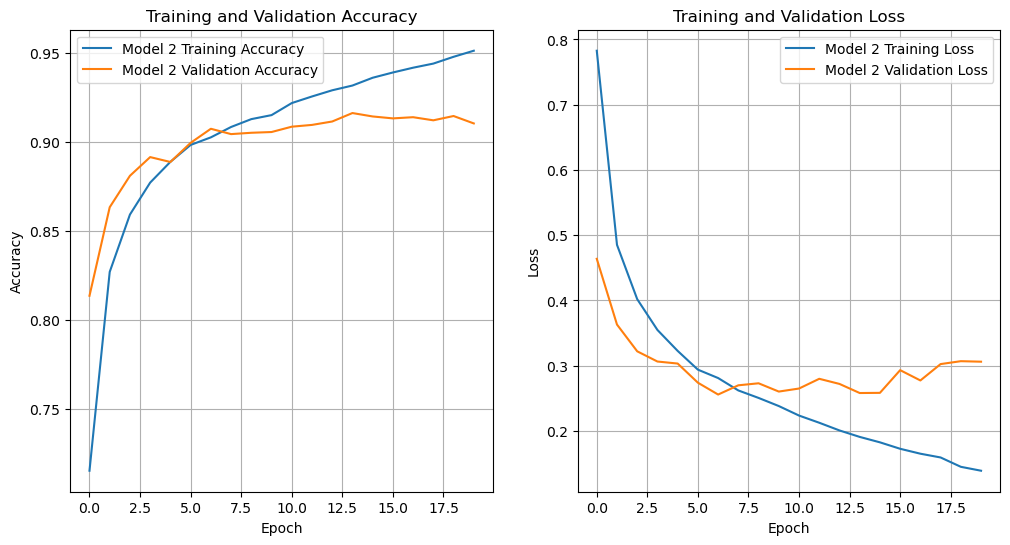

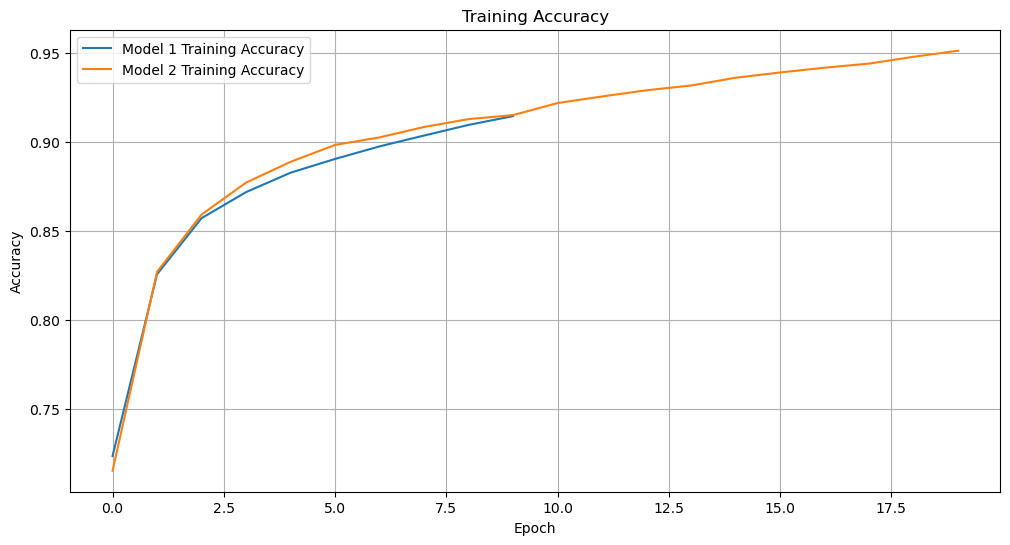

In [8]:
# Visualization of the training schedule
plot_training_histories([history_2], ['Model 2'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2], ['Model 1', 'Model 2'])

### Implementation of the third model with GELU activation, ADAMAX optimizer and 20 epochs

In [9]:
# Implementation of the model
model_3 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.Flatten(),
    layers.Dense(128, activation='gelu'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='gelu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_3.compile(optimizer='adamax',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_3 = model_3.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_3.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
750/750 [==============================] - 16s 18ms/step - loss: 1.0063 - accuracy: 0.6425 - val_loss: 0.5830 - val_accuracy: 0.7778
Epoch 2/20
750/750 [==============================] - 13s 17ms/step - loss: 0.6589 - accuracy: 0.7615 - val_loss: 0.5011 - val_accuracy: 0.8068
Epoch 3/20
750/750 [==============================] - 13s 17ms/step - loss: 0.5726 - accuracy: 0.7914 - val_loss: 0.4537 - val_accuracy: 0.8256
Epoch 4/20
750/750 [==============================] - 12s 17ms/step - loss: 0.5194 - accuracy: 0.8124 - val_loss: 0.4227 - val_accuracy: 0.8386
Epoch 5/20
750/750 [==============================] - 12s 17ms/step - loss: 0.4814 - accuracy: 0.8265 - val_loss: 0.3983 - val_accuracy: 0.8485
Epoch 6/20
750/750 [==============================] - 12s 17ms/step - loss: 0.4480 - accuracy: 0.8411 - val_loss: 0.3738 - val_accuracy: 0.8567
Epoch 7/20
750/750 [==============================] - 12s 17ms/step - loss: 0.4238 - accuracy: 0.8502 - val_loss: 0.3647 - val_accuracy:

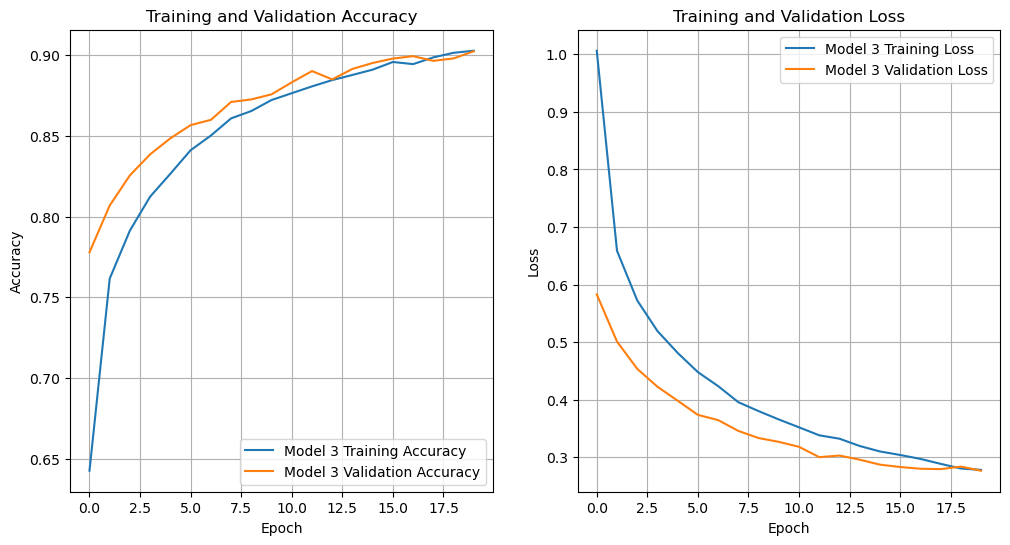

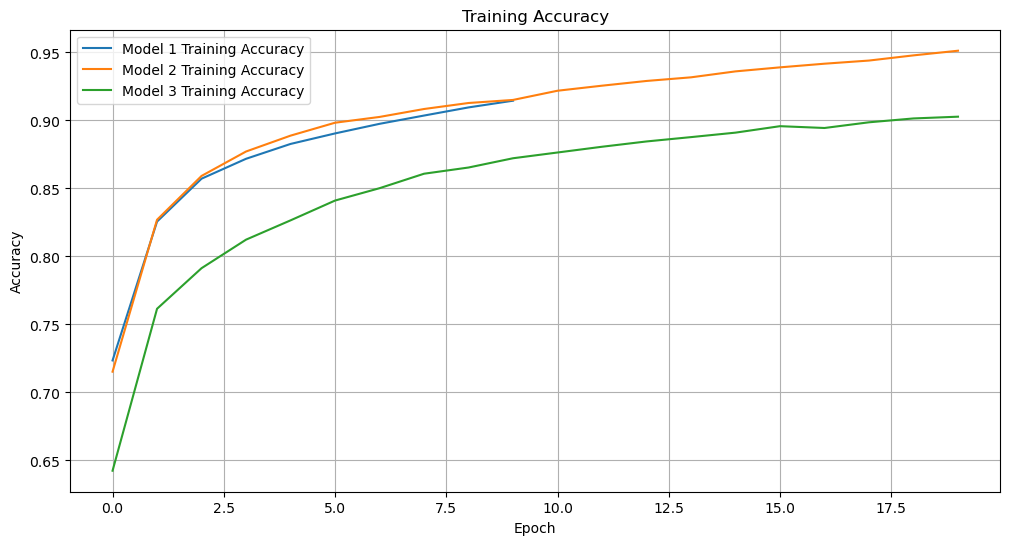

In [10]:
# Visualization of the training schedule
plot_training_histories([history_3], ['Model 3'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3], ['Model 1', 'Model 2', 'Model 3'])

### Implementation of the fourth model with GELU activation, ADAM optimizer, 20 epochs and L2 regularizer

In [11]:
# Implementation of the model
model_4 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='gelu', kernel_regularizer=regularizers.l2(0.001), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Flatten(),
    layers.Dense(128, activation='gelu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(64, activation='gelu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_4.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_4 = model_4.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_4.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/20
750/750 [==============================] - 16s 18ms/step - loss: 1.0531 - accuracy: 0.7075 - val_loss: 0.6855 - val_accuracy: 0.8124
Epoch 2/20
750/750 [==============================] - 13s 17ms/step - loss: 0.7129 - accuracy: 0.8061 - val_loss: 0.5883 - val_accuracy: 0.8389
Epoch 3/20
750/750 [==============================] - 13s 18ms/step - loss: 0.6265 - accuracy: 0.8334 - val_loss: 0.5384 - val_accuracy: 0.8538
Epoch 4/20
750/750 [==============================] - 13s 18ms/step - loss: 0.5808 - accuracy: 0.8480 - val_loss: 0.5436 - val_accuracy: 0.8508
Epoch 5/20
750/750 [==============================] - 13s 17ms/step - loss: 0.5572 - accuracy: 0.8568 - val_loss: 0.4921 - val_accuracy: 0.8722
Epoch 6/20
750/750 [==============================] - 13s 17ms/step - loss: 0.5361 - accuracy: 0.8634 - val_loss: 0.5043 - val_accuracy: 0.8681
Epoch 7/20
750/750 [==============================] - 12s 17ms/step - loss: 0.5202 - accuracy: 0.8685 - val_loss: 0.4829 - val_accuracy:

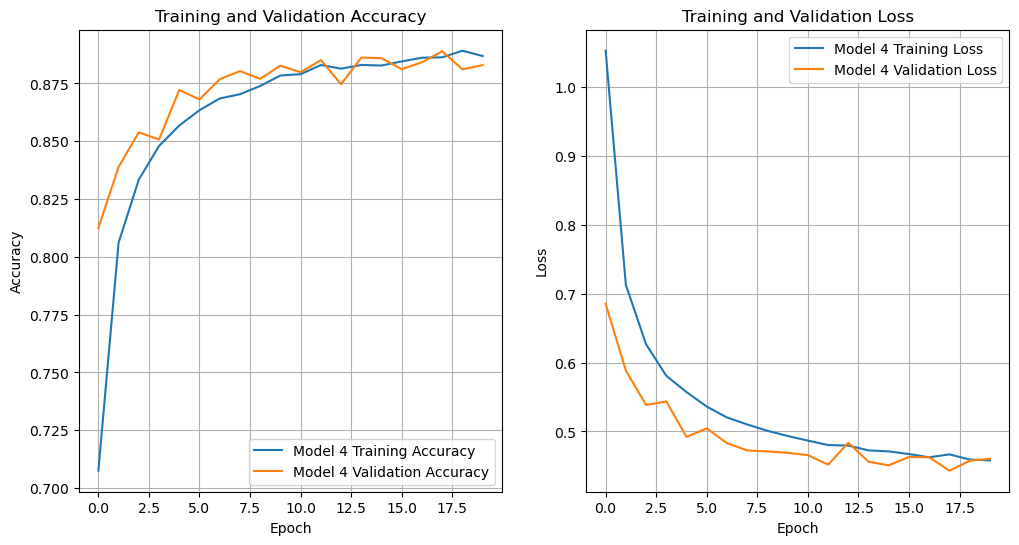

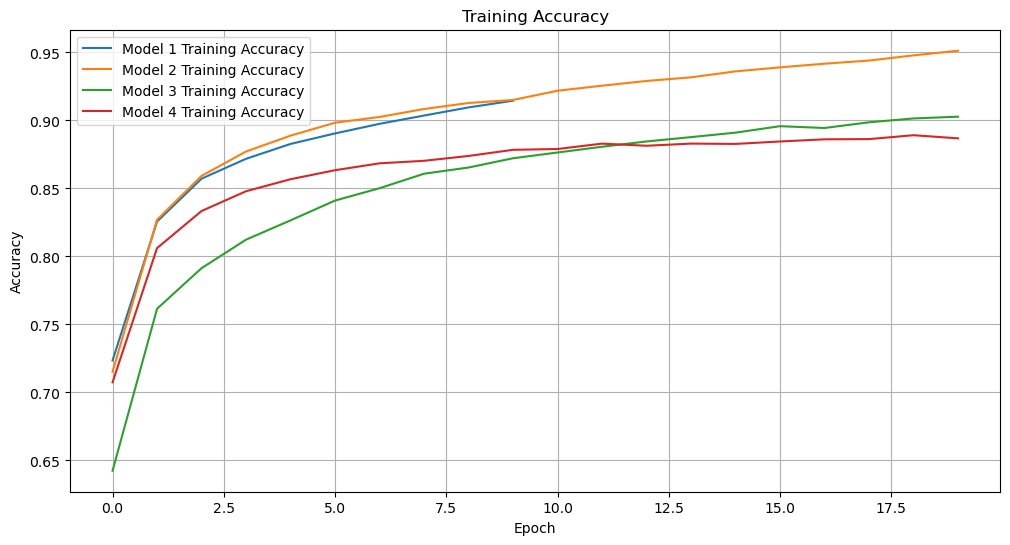

In [12]:
# Visualization of the training schedule
plot_training_histories([history_4], ['Model 4'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4], ['Model 1', 'Model 2', 'Model 3', 'Model 4'])

### Implementation of the fifth model with GELU activation, ADAM optimizer, 30 epochs and 30% Dropout

In [13]:
# Implementation of the model
model_5 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.Flatten(),
    layers.Dense(128, activation='gelu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='gelu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_5.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_5 = model_5.fit(train_images, train_labels, epochs=30, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_5.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/30
750/750 [==============================] - 16s 18ms/step - loss: 0.6789 - accuracy: 0.7456 - val_loss: 0.4285 - val_accuracy: 0.8379
Epoch 2/30
750/750 [==============================] - 13s 17ms/step - loss: 0.4196 - accuracy: 0.8470 - val_loss: 0.3657 - val_accuracy: 0.8624
Epoch 3/30
750/750 [==============================] - 12s 16ms/step - loss: 0.3493 - accuracy: 0.8737 - val_loss: 0.3250 - val_accuracy: 0.8763
Epoch 4/30
750/750 [==============================] - 12s 16ms/step - loss: 0.3088 - accuracy: 0.8881 - val_loss: 0.3003 - val_accuracy: 0.8836
Epoch 5/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2822 - accuracy: 0.8973 - val_loss: 0.2728 - val_accuracy: 0.9012
Epoch 6/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2598 - accuracy: 0.9049 - val_loss: 0.2766 - val_accuracy: 0.8989
Epoch 7/30
750/750 [==============================] - 12s 16ms/step - loss: 0.2407 - accuracy: 0.9114 - val_loss: 0.2625 - val_accuracy:

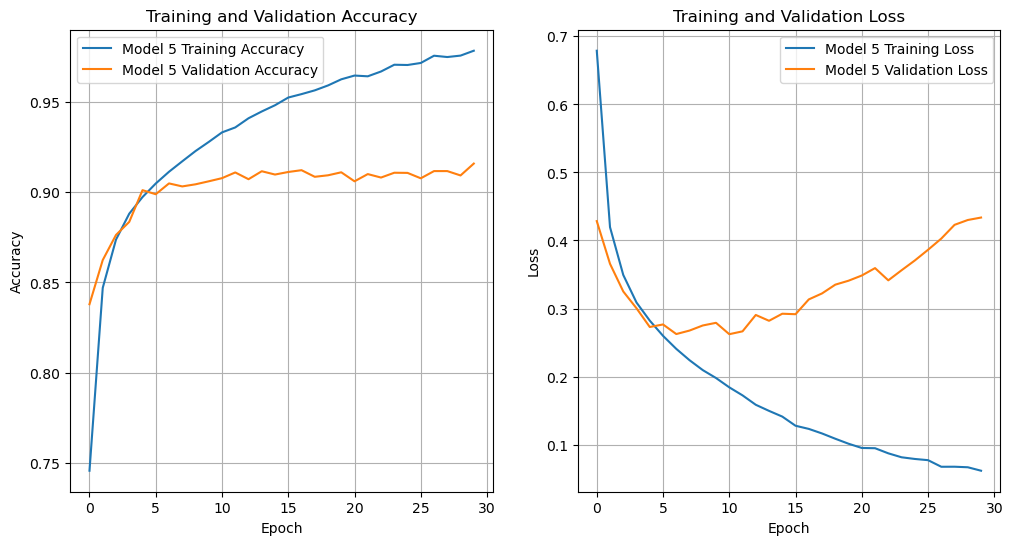

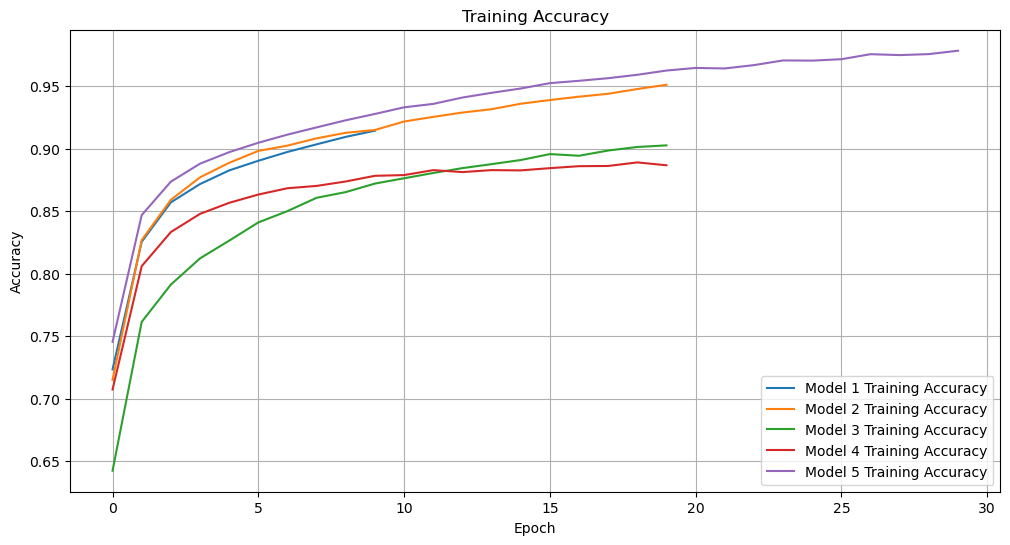

In [14]:
# Visualization of the training schedule
plot_training_histories([history_5], ['Model 5'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4, history_5], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'])

### Implementation of the sixth model with GELU activation, ADAM optimizer, 10 epochs and 30% Dropout

In [15]:
# Implementation of the model
model_6 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='gelu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='gelu'),
    layers.Flatten(),
    layers.Dense(128, activation='gelu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='gelu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_6.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_6 = model_6.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_6.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/10
750/750 [==============================] - 10s 12ms/step - loss: 0.6928 - accuracy: 0.7447 - val_loss: 0.4473 - val_accuracy: 0.8307
Epoch 2/10
750/750 [==============================] - 9s 12ms/step - loss: 0.4324 - accuracy: 0.8396 - val_loss: 0.3607 - val_accuracy: 0.8638
Epoch 3/10
750/750 [==============================] - 9s 12ms/step - loss: 0.3616 - accuracy: 0.8683 - val_loss: 0.3347 - val_accuracy: 0.8739
Epoch 4/10
750/750 [==============================] - 9s 12ms/step - loss: 0.3227 - accuracy: 0.8840 - val_loss: 0.2915 - val_accuracy: 0.8932
Epoch 5/10
750/750 [==============================] - 10s 13ms/step - loss: 0.2899 - accuracy: 0.8959 - val_loss: 0.3030 - val_accuracy: 0.8855
Epoch 6/10
750/750 [==============================] - 10s 13ms/step - loss: 0.2662 - accuracy: 0.9022 - val_loss: 0.2877 - val_accuracy: 0.8927
Epoch 7/10
750/750 [==============================] - 10s 13ms/step - loss: 0.2494 - accuracy: 0.9077 - val_loss: 0.2652 - val_accuracy: 0.

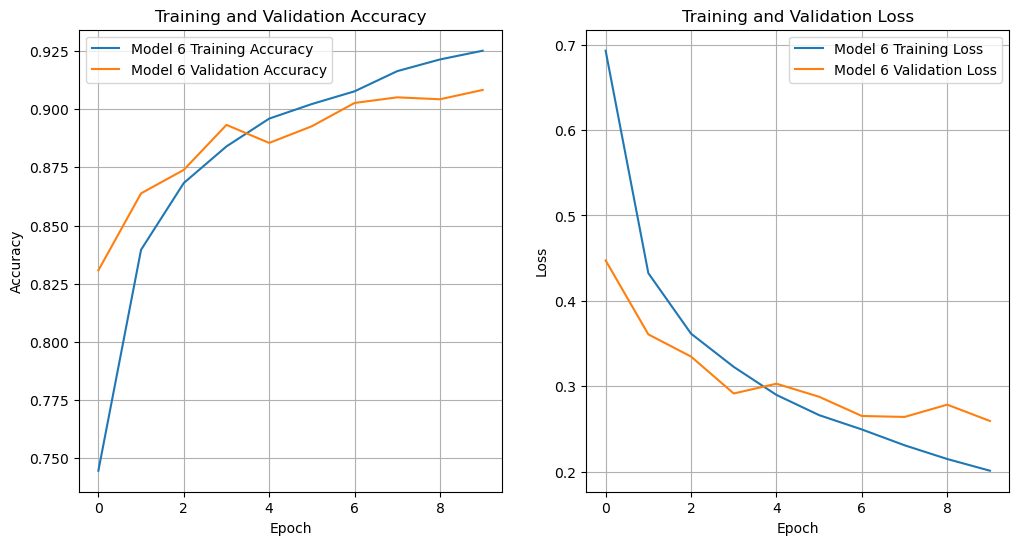

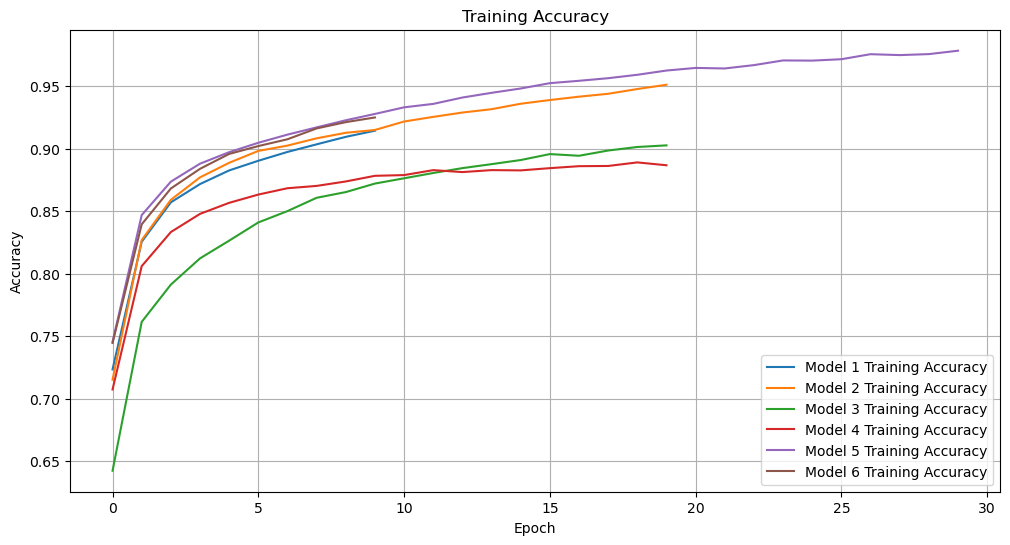

In [17]:
# Visualization of the training schedule
plot_training_histories([history_6], ['Model 6'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4, history_5, history_6], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'])

### Implementation of the seventh model with RELU activation, ADAM optimizer, 100 epochs and 25% Dropout

In [3]:
# Implementation of the model
model_7 = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(10, activation='softmax')
])

# Compilation of the model
model_7.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model training
history_7 = model_7.fit(train_images, train_labels, epochs=100, batch_size=64, validation_split=0.2)

# Evaluation of the model
test_loss, test_acc = model_7.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

Epoch 1/100
750/750 [==============================] - 27s 17ms/step - loss: 0.6822 - accuracy: 0.7490 - val_loss: 0.4423 - val_accuracy: 0.8385
Epoch 2/100
750/750 [==============================] - 9s 12ms/step - loss: 0.4166 - accuracy: 0.8514 - val_loss: 0.3465 - val_accuracy: 0.8747
Epoch 3/100
750/750 [==============================] - 9s 12ms/step - loss: 0.3486 - accuracy: 0.8765 - val_loss: 0.3028 - val_accuracy: 0.8901
Epoch 4/100
750/750 [==============================] - 9s 12ms/step - loss: 0.3093 - accuracy: 0.8888 - val_loss: 0.2933 - val_accuracy: 0.8915
Epoch 5/100
750/750 [==============================] - 9s 12ms/step - loss: 0.2838 - accuracy: 0.8991 - val_loss: 0.2703 - val_accuracy: 0.9001
Epoch 6/100
750/750 [==============================] - 9s 12ms/step - loss: 0.2597 - accuracy: 0.9071 - val_loss: 0.2708 - val_accuracy: 0.9003
Epoch 7/100
750/750 [==============================] - 9s 12ms/step - loss: 0.2391 - accuracy: 0.9149 - val_loss: 0.2560 - val_accuracy

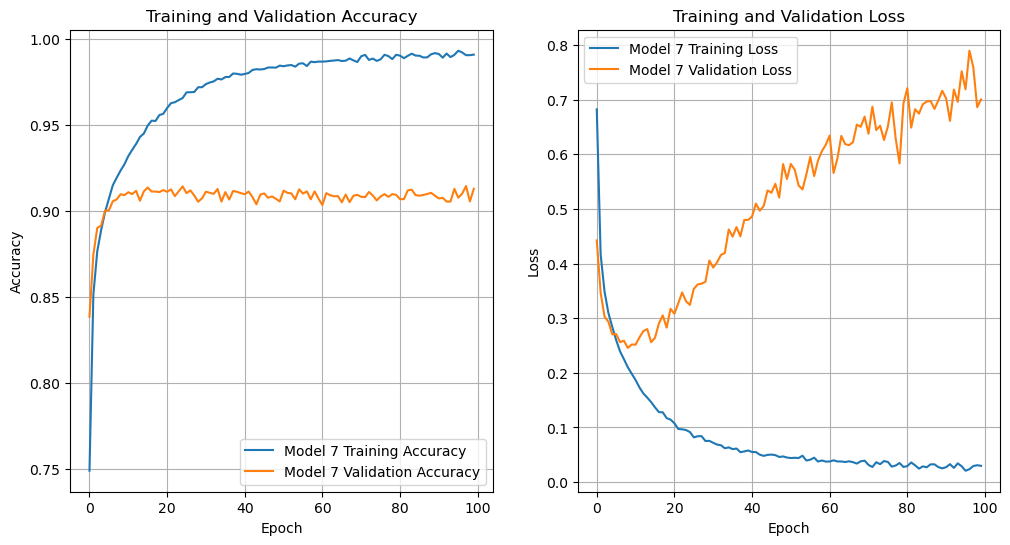

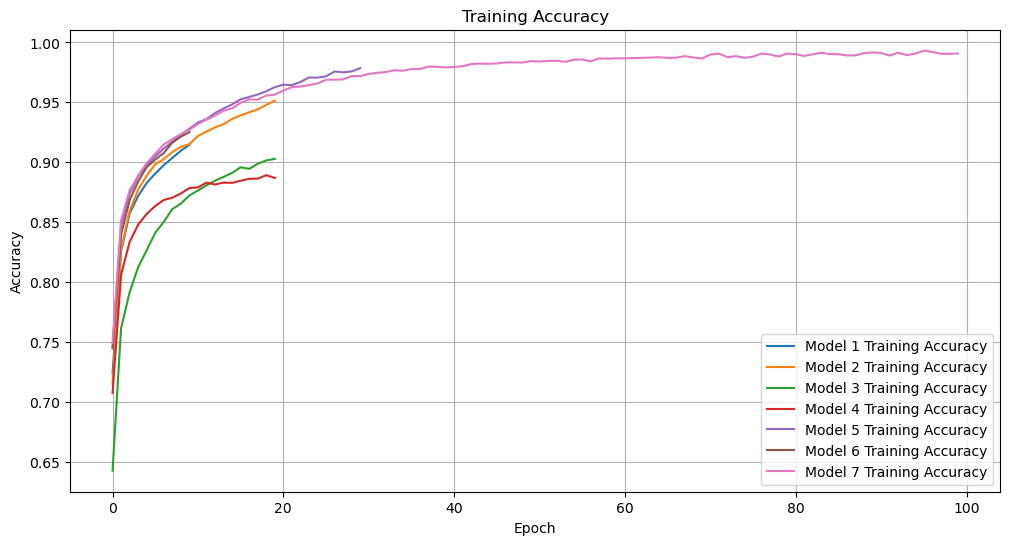

In [18]:
# Visualization of the training schedule
plot_training_histories([history_7], ['Model 7'])

# Training graphs for models
plot_training_histories_compare([history_1, history_2, history_3, history_4, history_5, history_6, history_7], ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6', 'Model 7'])

### Сonclusion:

##### As we can see, we get the best accuracy result 91,25% in the seventh model, with the following parameters: RELU activation, ADAM optimizer, 100 epochs and 25% Dropout

### Testing the work of the seventh model

313/313 [==============================] - 1s 2ms/step


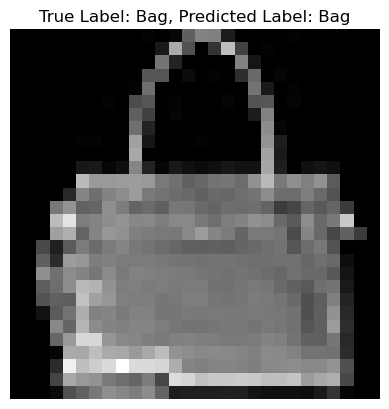

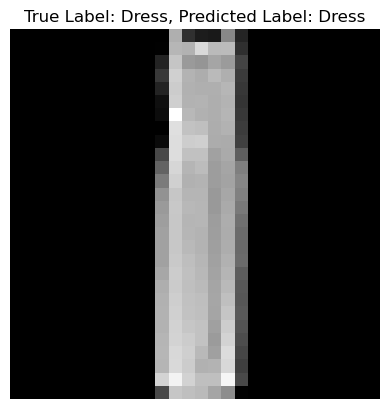

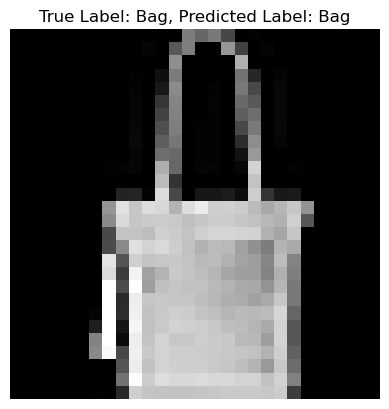

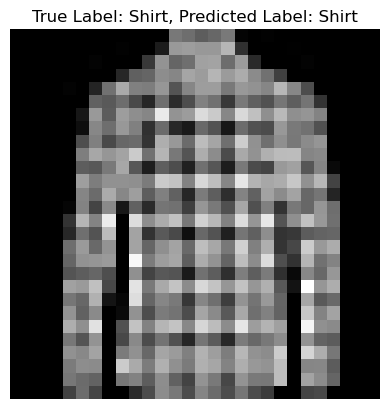

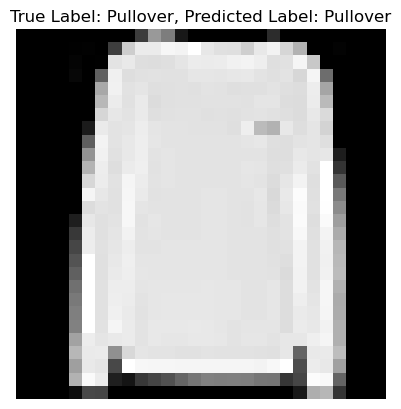

In [26]:
# Make predictions on test data
predictions = model_7.predict(test_images)

# Create a dictionary to map numerical labels to textual descriptions
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Visualize 5 random examples
for _ in range(5):
    # Select a random index
    index = np.random.randint(0, len(test_images))

    # Get the index where test_labels[index] equals 1
    true_label_index = np.argmax(test_labels[index])

    # Visualization
    plt.imshow(test_images[index], cmap='gray')
    plt.axis('off')
    true_label_text = class_labels[true_label_index] 
    predicted_label_text = class_labels[np.argmax(predictions[index])]
    plt.title(f'True Label: {true_label_text}, Predicted Label: {predicted_label_text}')
    plt.show()